In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv('bitcoin.csv')

In [6]:
print(data)

                   snapped_at         price    market_cap  total_volume
0     2013-04-28 00:00:00 UTC    135.300000  1.500518e+09  0.000000e+00
1     2013-04-29 00:00:00 UTC    141.960000  1.575032e+09  0.000000e+00
2     2013-04-30 00:00:00 UTC    135.300000  1.501657e+09  0.000000e+00
3     2013-05-01 00:00:00 UTC    117.000000  1.298952e+09  0.000000e+00
4     2013-05-02 00:00:00 UTC    103.430000  1.148668e+09  0.000000e+00
...                       ...           ...           ...           ...
4108  2024-07-29 00:00:00 UTC  68242.247444  1.346263e+12  1.717524e+10
4109  2024-07-30 00:00:00 UTC  66770.320918  1.317581e+12  4.252904e+10
4110  2024-07-31 00:00:00 UTC  66219.051025  1.306758e+12  2.889238e+10
4111  2024-08-01 00:00:00 UTC  64679.778647  1.275401e+12  3.140368e+10
4112  2024-08-02 00:00:00 UTC  65357.529608  1.289157e+12  3.891130e+10

[4113 rows x 4 columns]


In [8]:
data.drop(columns=['market_cap', 'total_volume'], inplace=True)

In [10]:
print(data)

                   snapped_at         price
0     2013-04-28 00:00:00 UTC    135.300000
1     2013-04-29 00:00:00 UTC    141.960000
2     2013-04-30 00:00:00 UTC    135.300000
3     2013-05-01 00:00:00 UTC    117.000000
4     2013-05-02 00:00:00 UTC    103.430000
...                       ...           ...
4108  2024-07-29 00:00:00 UTC  68242.247444
4109  2024-07-30 00:00:00 UTC  66770.320918
4110  2024-07-31 00:00:00 UTC  66219.051025
4111  2024-08-01 00:00:00 UTC  64679.778647
4112  2024-08-02 00:00:00 UTC  65357.529608

[4113 rows x 2 columns]


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   snapped_at  4113 non-null   object 
 1   price       4113 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.4+ KB


In [14]:
data.rename(columns={'snapped_at':'date'}, inplace=True)

In [16]:
print(data)

                         date         price
0     2013-04-28 00:00:00 UTC    135.300000
1     2013-04-29 00:00:00 UTC    141.960000
2     2013-04-30 00:00:00 UTC    135.300000
3     2013-05-01 00:00:00 UTC    117.000000
4     2013-05-02 00:00:00 UTC    103.430000
...                       ...           ...
4108  2024-07-29 00:00:00 UTC  68242.247444
4109  2024-07-30 00:00:00 UTC  66770.320918
4110  2024-07-31 00:00:00 UTC  66219.051025
4111  2024-08-01 00:00:00 UTC  64679.778647
4112  2024-08-02 00:00:00 UTC  65357.529608

[4113 rows x 2 columns]


In [18]:
data['date'] = pd.to_datetime(data['date'])

In [20]:
def draw_plot(data):
    data['date'] = pd.to_datetime(data['date'])

    data['year'] = data['date'].dt.year

    mean_by_year = data.groupby('year')['price'].mean()
    variance_by_year = data.groupby('year')['price'].var()

    plt.figure(figsize=(20, 6))

    plt.plot(data['date'], data['price'], c='orange', label='True values')

    for year, mean in mean_by_year.items():
        plt.plot(data[data['year'] == year]['date'], [mean] * len(data[data['year'] == year]['date']), color='r', linestyle='--', label=f'Mean - {year}')
        
    for year, variance in variance_by_year.items():
        plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] + np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean + Variance - {year}')
        plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] - np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean - Variance - {year}')

    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.title("BTC Price with Mean and Variance by Year", fontsize=16)
    plt.show()

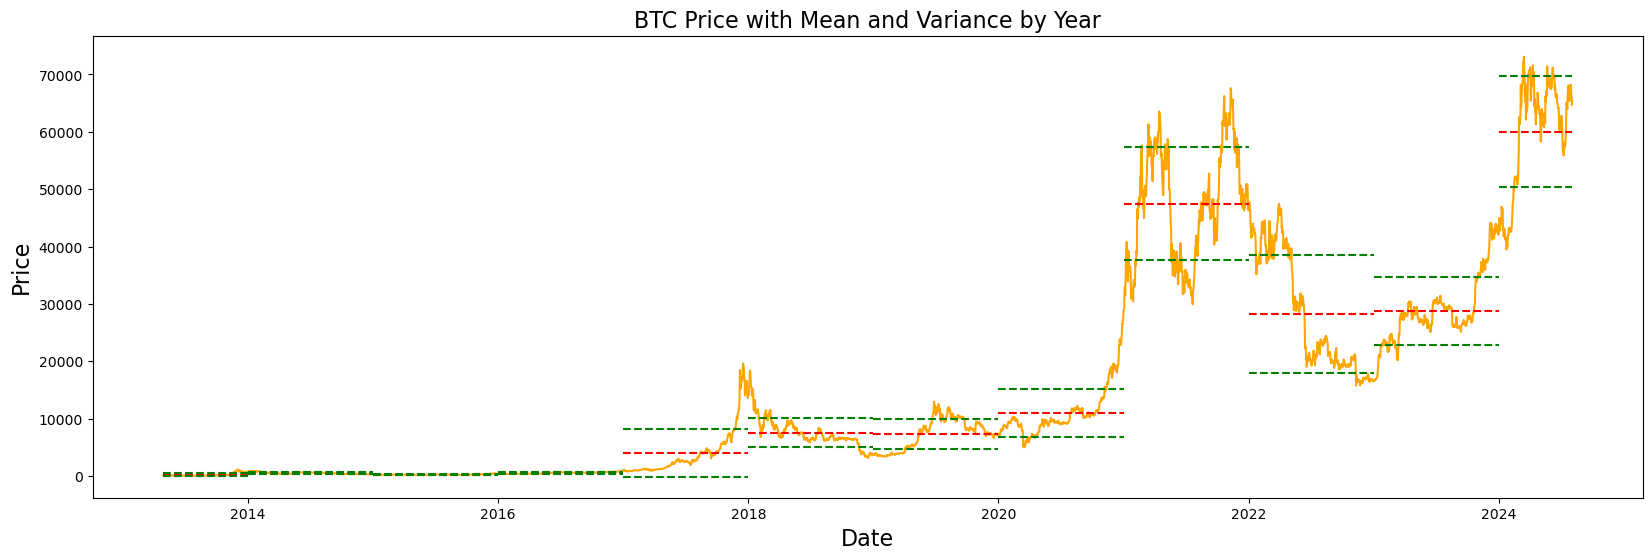

In [22]:
draw_plot(data)

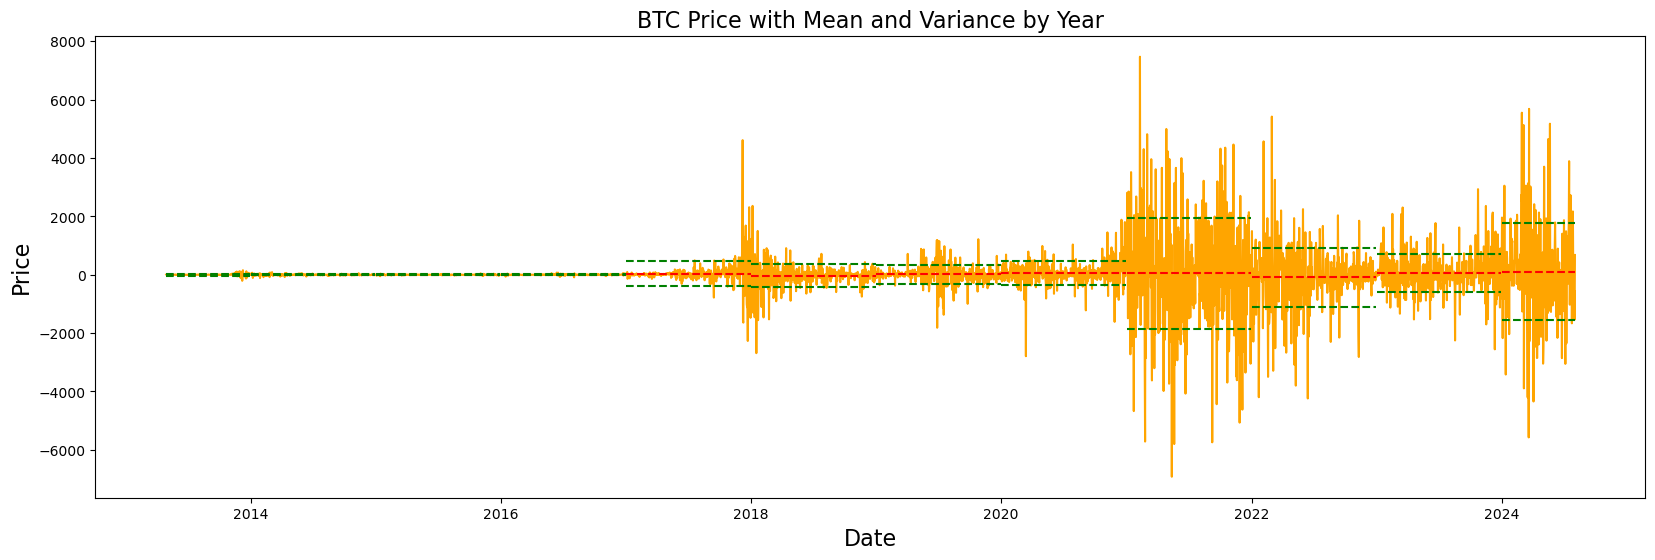

In [24]:
df_diff = data.copy()
df_diff['price'] = data['price'].diff()
draw_plot(df_diff)

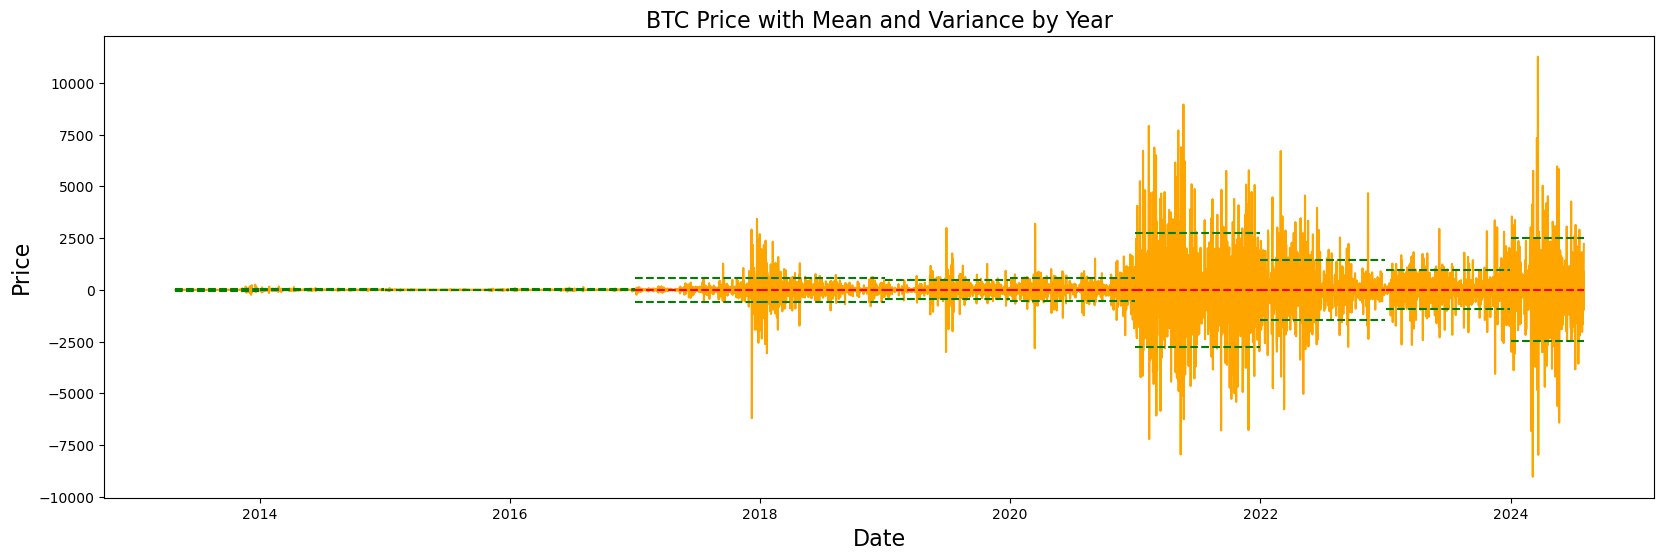

In [26]:
df_2diff = data.copy()
df_2diff['price'] = data['price'].diff().diff()
draw_plot(df_2diff)

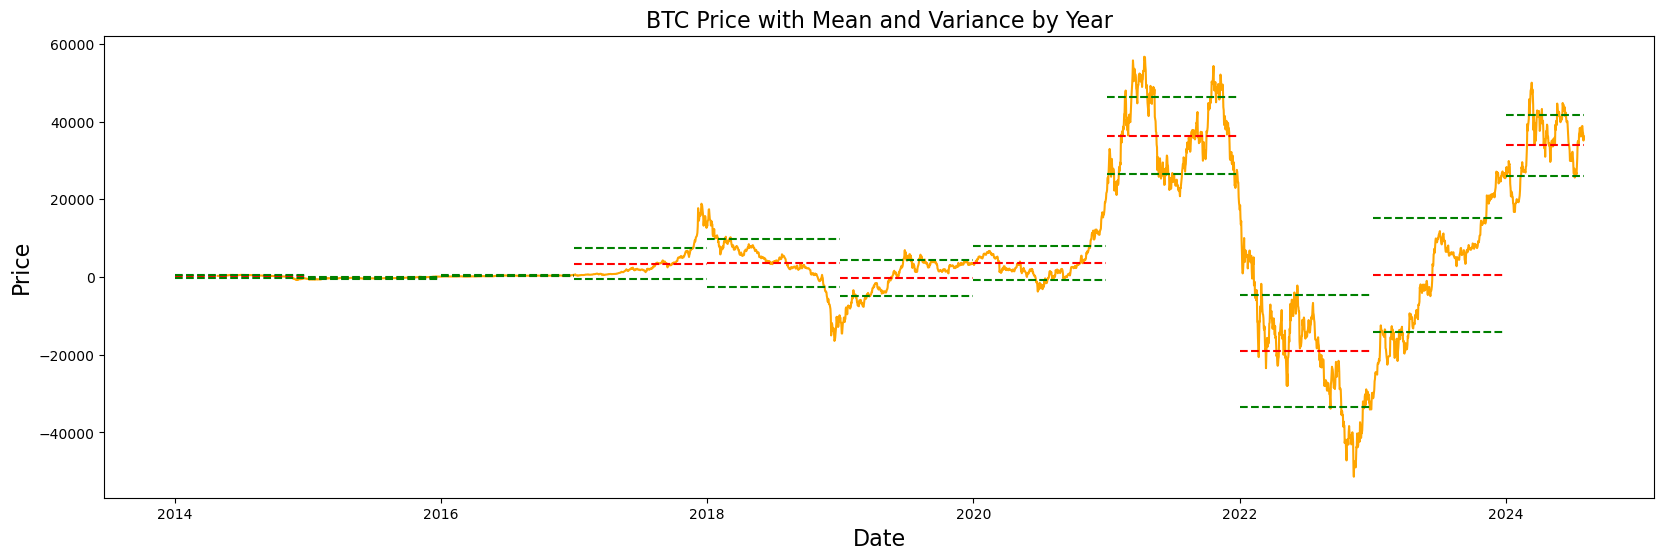

In [28]:
df_ssdiff = data.copy()
df_ssdiff['price'] = data['price'].diff(periods=365)
draw_plot(df_ssdiff)

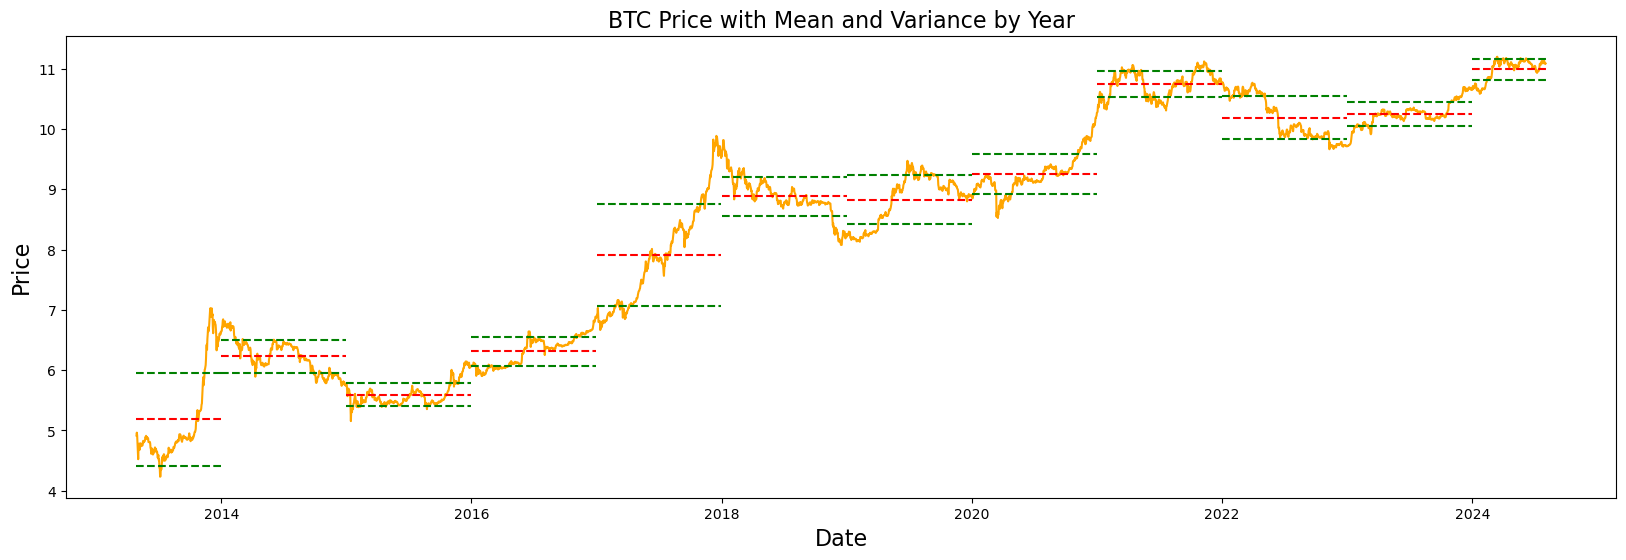

In [30]:
df_logt = data.copy()
df_logt['price'] = np.log1p(data['price'])
draw_plot(df_logt)

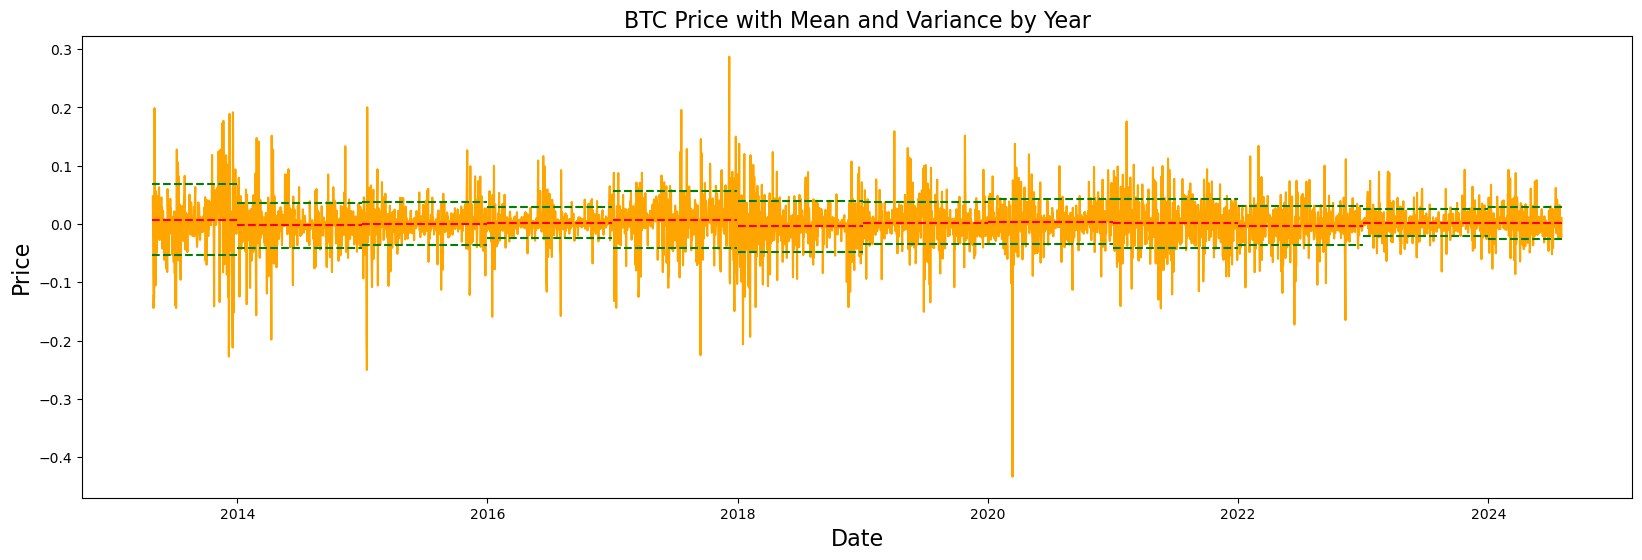

In [32]:
df_logt_diff = df_logt.copy()
df_logt_diff['price'] = df_logt['price'].diff()
draw_plot(df_logt_diff)

In [40]:
#Rolling window by year
data_year_mean = data.copy()
data_year_mean['price'] = data['price'].rolling(window=365).mean()

In [42]:
#Rolling window by month
data_month_mean = data.copy()
data_month_mean['price'] = data['price'].rolling(window=30).mean()

In [44]:
#Expending window
data_expand = data.copy()
data_expand['price'] = data['price'].expanding().mean()

Text(0.5, 1.0, 'BTC Price')

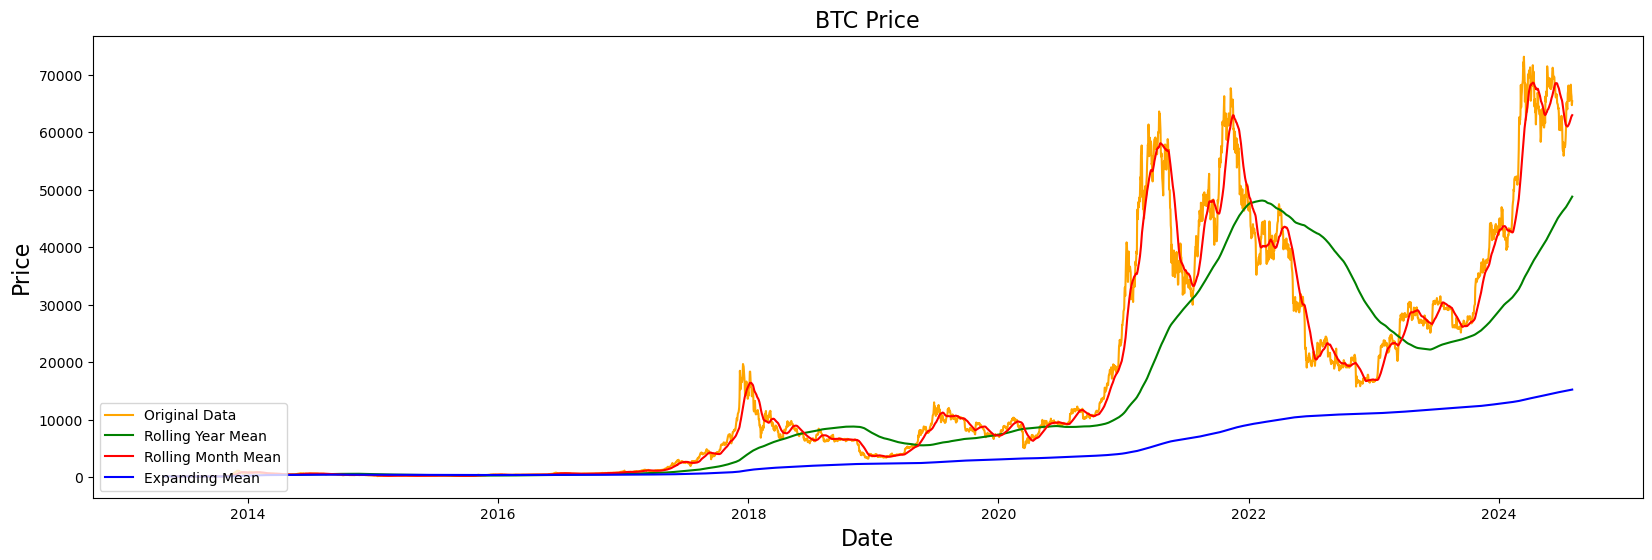

In [46]:
plt.figure(figsize=(20,6))
plt.plot(data['date'], data['price'], c='orange',label='Original Data')
plt.plot(data_year_mean['date'], data_year_mean['price'], c='green',label='Rolling Year Mean')
plt.plot(data_month_mean['date'], data_month_mean['price'], c='red',label='Rolling Month Mean')
plt.plot(data_expand['date'], data_expand['price'], c='blue',label='Expanding Mean')

plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price", fontsize=16)

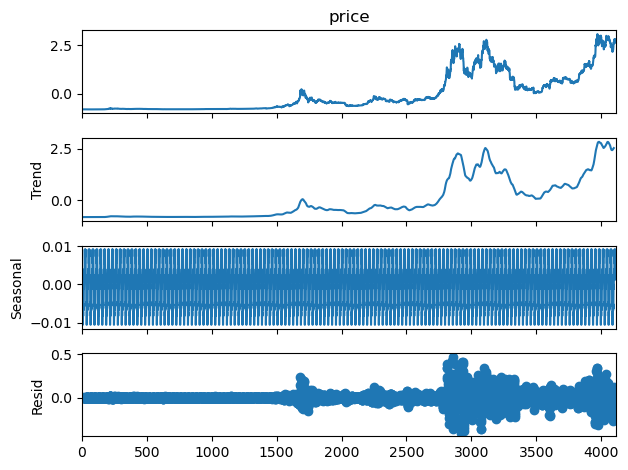

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the series
decomposition = seasonal_decompose(data['price'], model='additive', period=30)

# Plot the decomposition
decomposition.plot()
plt.show()  # Ensure plots are displayed properly in some environments

In [52]:
data['trend'] = decomposition.trend
data['seasonal'] = decomposition.seasonal
print(data)

                          date         price  year  trend    seasonal
0    2013-04-28 00:00:00+00:00    135.300000  2013    NaN   24.296794
1    2013-04-29 00:00:00+00:00    141.960000  2013    NaN   45.476213
2    2013-04-30 00:00:00+00:00    135.300000  2013    NaN   40.221248
3    2013-05-01 00:00:00+00:00    117.000000  2013    NaN   12.677878
4    2013-05-02 00:00:00+00:00    103.430000  2013    NaN -104.314941
...                        ...           ...   ...    ...         ...
4108 2024-07-29 00:00:00+00:00  68242.247444  2024    NaN  171.826894
4109 2024-07-30 00:00:00+00:00  66770.320918  2024    NaN   95.665106
4110 2024-07-31 00:00:00+00:00  66219.051025  2024    NaN   24.296794
4111 2024-08-01 00:00:00+00:00  64679.778647  2024    NaN   45.476213
4112 2024-08-02 00:00:00+00:00  65357.529608  2024    NaN   40.221248

[4113 rows x 5 columns]


In [54]:
data['trend'] = data['trend'].ffill()
data['trend'] = data['trend'].bfill()
data['trend']

0         119.831750
1         119.831750
2         119.831750
3         119.831750
4         119.831750
            ...     
4108    62879.763143
4109    62879.763143
4110    62879.763143
4111    62879.763143
4112    62879.763143
Name: trend, Length: 4113, dtype: float64

In [56]:
# split data
split_date = '2022-04-20'
train_data = data[data['date'] <= split_date]
test_data = data[data['date'] > split_date]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:, 'price'] = scaler.fit_transform(data[['price']])

scaler_train = StandardScaler()
train_data.loc[:, 'price'] = scaler_train.fit_transform(train_data[['price']])

scaler_test = StandardScaler()
test_data.loc[:, 'price'] = scaler_test.fit_transform(test_data[['price']])

In [60]:
# re-applied data with scaled price
split_date = '2022-04-20'
train_data = data[data['date'] <= split_date]
test_data = data[data['date'] > split_date]

In [62]:
X_train = train_data['date']
y_train = train_data['price']

X_test = test_data['date']
y_test = test_data['price']

In [64]:
n_features = 1

train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dropout, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [74]:
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=32)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=32)
# Define the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [76]:
# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

Mean Squared Error: 0.018752713901910485
Mean Absolute Percentage Error: 14.953685681195125


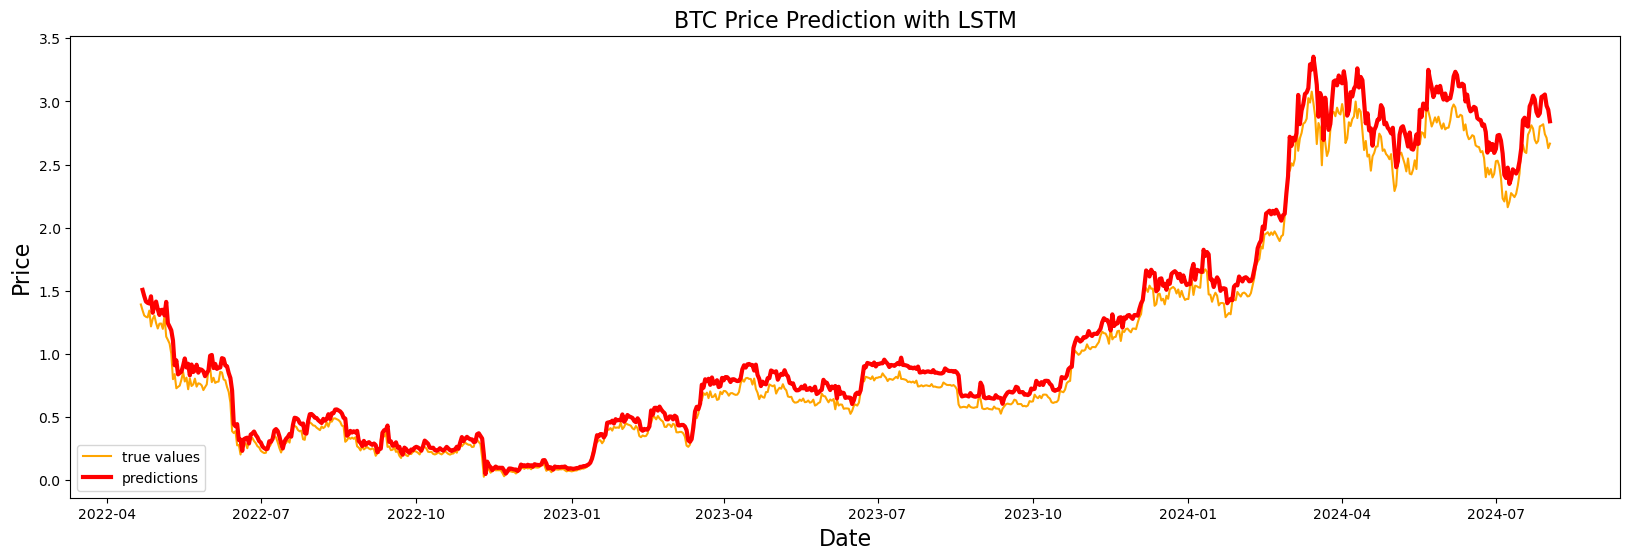

In [78]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with LSTM", fontsize=16);

In [80]:
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)
# Define the LSTM model
model = Sequential([
    SimpleRNN(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
Mean Squared Error: 0.0035424698871062512
Mean Absolute Percentage Error: 6.204530606604836


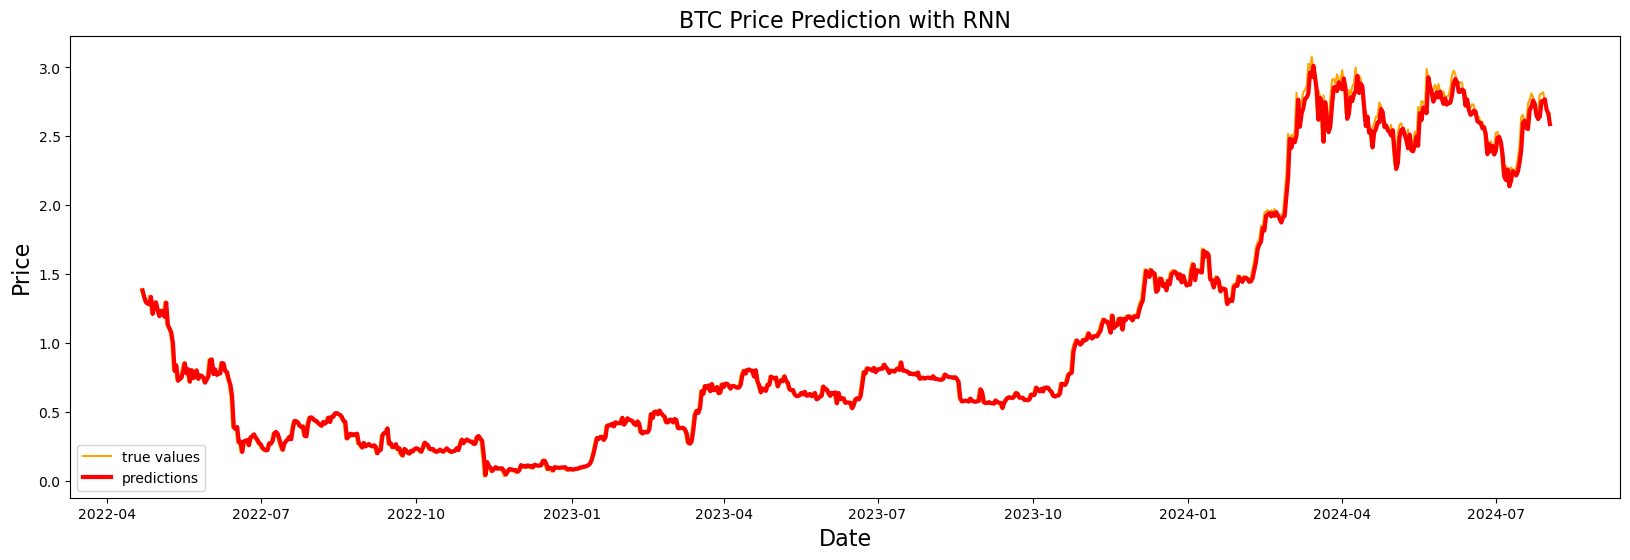

In [82]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with RNN", fontsize=16);

In [84]:
import xgboost as xgb

def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    X = pd.DataFrame()
    X['hour'] = df['date'].dt.hour
    X['dayofweek'] = df['date'].dt.dayofweek
    X['quarter'] = df['date'].dt.quarter
    X['month'] = df['date'].dt.month
    X['year'] = df['date'].dt.year
    X['dayofyear'] = df['date'].dt.dayofyear
    X['dayofmonth'] = df['date'].dt.day
    X['weekofyear'] = df['date'].dt.isocalendar().week

    if label:
        y = df[label]
        return X, y
    return X

In [86]:
X_train, y_train = create_features(train_data, label='price')
X_test, y_test = create_features(test_data, label='price')

In [88]:
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 5, alpha = 10, n_estimators = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Mean Squared Error: 1.6781106901908303
Mean Absolute Percentage Error: 82.72933716861239
